## Predicción de precios de propiedades en la Argentina

* En este proyecto personal vamos a intentar predecir el precio de una propiedad dependiendo de su ubicación, metros cuadrados del terrreno, metros cuadrados cubiertos y cantidad de habitaciones
* Los datos fueron extraidos de la pagina: https://data.world/

Leemos los datos y vemos algunas caracteristicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("properati-AR-2016-11-01-properties-sell.csv")
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,3429244.0,"-34.6566088,-58.8069107",-34.656609,-58.806911,120000.0,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://san-antonio-de-padua.properati.com.ar/u...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs-cf.properati.com/4/aKcEetbJUfrn...
1,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,3427458.0,"-34.6036844,-58.3815591",-34.603684,-58.381559,83000.0,...,40.0,2075.000000,2075.000000,1.0,2.0,300,http://villa-crespo.properati.com.ar/13tz_vent...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/8/ujkSk81S7fhu...
2,2012-10-22,sell,apartment,San Bernardo,|Argentina|Buenos Aires Costa Atlántica|San Be...,3429228.0,"-36.6879204,-56.6780098",-36.687920,-56.678010,49000.0,...,42.0,1042.553191,1166.666667,7.0,3.0,750,http://san-bernardo-buenos-aires-costa-atlanti...,Comodo departamento 3 ambientes ubicado en cal...,DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/6/n5yiUwL9Gjw3...
3,2012-10-22,sell,house,Maschwitz,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ma...,NaN,"-34.3938943878,-58.7683713751",-34.393894,-58.768371,200000.0,...,200.0,800.000000,1000.000000,NaN,4.0,NaN,http://maschwitz.properati.com.ar/1w41_venta_c...,MUY BUENA CASA DE 3/4 DORMITORIOS Y CASA DE HU...,CASA EN VENTA,https://thumbs-cf.properati.com/4/KbG2PtmxJCVy...
4,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,3429244.0,"-34.668175,-58.6996246",-34.668175,-58.699625,NaN,...,220.0,NaN,NaN,NaN,NaN,NaN,http://san-antonio-de-padua.properati.com.ar/2...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs-cf.properati.com/7/3xCBy82O4-k1...


In [3]:
df.shape

(145748, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145748 entries, 0 to 145747
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  145748 non-null  object 
 1   operation                   145748 non-null  object 
 2   property_type               145748 non-null  object 
 3   place_name                  145725 non-null  object 
 4   place_with_parent_names     145748 non-null  object 
 5   geonames_id                 123873 non-null  float64
 6   lat-lon                     118816 non-null  object 
 7   lat                         118816 non-null  float64
 8   lon                         118815 non-null  float64
 9   price                       123155 non-null  float64
 10  currency                    123149 non-null  object 
 11  price_aprox_local_currency  123155 non-null  float64
 12  price_aprox_usd             123155 non-null  float64
 13  surface_total_

In [5]:
df.columns.values

array(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail'],
      dtype=object)

### Limpieza de datos

In [6]:
df = df.drop(["created_on", "operation", "geonames_id", "lat-lon", "lat", "lon", "currency", 
              "price_aprox_local_currency", "price_aprox_usd", "price_per_m2", "properati_url", "description",
             "title", "image_thumbnail", "place_with_parent_names", "expenses", "floor","price_usd_per_m2"], axis="columns")
df.head()

,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,rooms
0,house,San Antonio De Padua,120000.0,333.0,93.0,NaN
1,apartment,Villa Crespo,83000.0,40.0,40.0,2.0
2,apartment,San Bernardo,49000.0,47.0,42.0,3.0
3,house,Maschwitz,200000.0,250.0,200.0,4.0
4,house,San Antonio De Padua,NaN,220.0,220.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145748 entries, 0 to 145747
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   property_type          145748 non-null  object 
 1   place_name             145725 non-null  object 
 2   price                  123155 non-null  float64
 3   surface_total_in_m2    93515 non-null   float64
 4   surface_covered_in_m2  113961 non-null  float64
 5   rooms                  80893 non-null   float64
dtypes: float64(4), object(2)
memory usage: 6.7+ MB


In [8]:
df.isnull().sum()

property_type                0
place_name                  23
price                    22593
surface_total_in_m2      52233
surface_covered_in_m2    31787
rooms                    64855
dtype: int64

In [9]:
df = df.dropna(subset=["price", "place_name", "surface_total_in_m2", "rooms", "surface_covered_in_m2"])
df.isnull().sum()

property_type            0
place_name               0
price                    0
surface_total_in_m2      0
surface_covered_in_m2    0
rooms                    0
dtype: int64

In [10]:
df.shape

(41816, 6)

In [11]:
df.head(5)

,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,rooms
1,apartment,Villa Crespo,83000.0,40.0,40.0,2.0
2,apartment,San Bernardo,49000.0,47.0,42.0,3.0
3,house,Maschwitz,200000.0,250.0,200.0,4.0
9,house,Mataderos,170000.0,300.0,103.0,5.0
22,apartment,Haedo,100000.0,43.0,36.0,2.0


In [12]:
df["property_type"].unique()

array(['apartment', 'house', 'PH', 'store'], dtype=object)

In [13]:
len(df["place_name"].unique())

621

In [14]:
df["surface_total_in_m2"].unique()

array([  40.,   47.,  250., ...,  613., 1489.,  747.])

In [15]:
#Borramos las propiedades con surface_total_in_m2 igual a 0
df = df[~(df["surface_total_in_m2"] == 0)]
(df["surface_total_in_m2"] == 0).sum()

0

In [16]:
#Borramos las propiedades con price igual a 0
df = df[~(df["price"] == 0)]
(df["price"] == 0).sum()

0

In [17]:
#Creamos la columna price_per_m2
df["price_per_m2"] = df["price"] / df["surface_total_in_m2"]
df.head()

,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,rooms,price_per_m2
1,apartment,Villa Crespo,83000.0,40.0,40.0,2.0,2075.000000
2,apartment,San Bernardo,49000.0,47.0,42.0,3.0,1042.553191
3,house,Maschwitz,200000.0,250.0,200.0,4.0,800.000000
9,house,Mataderos,170000.0,300.0,103.0,5.0,566.666667
22,apartment,Haedo,100000.0,43.0,36.0,2.0,2325.581395


In [18]:
df.shape

(38065, 7)

In [19]:
len(df["place_name"].unique())

598

## Deteccion de outliers

In [20]:
#Sacamos los espacios un blanco al principio y al final de property_type
df["place_name"] = df["place_name"].apply(lambda x: x.strip())
location_stats = df.groupby("place_name")["place_name"].agg("count").sort_values(ascending=False)

In [21]:
location_stats.head(8)

place_name
Mar del Plata     4286
Punta del Este    2311
Ramos Mejía       1198
Palermo           1128
Belgrano          1024
Nordelta          1009
Montevideo         839
Córdoba            819
Name: place_name, dtype: int64

In [22]:
#Vemos cuantos lugares tienen menos de 10 propiedades
len(location_stats[location_stats <= 10])

375

In [23]:
#Creamos un algortitmo para eliminar los lugares con menos de 10 propiedades, ya que no vamos a poder sacar ninguna conclucion con tan pocas propiedades
location_stats_less_than_10 = location_stats[location_stats <= 10]
print (location_stats_less_than_10)

place_name
Haras María Elena            10
Country Maschwitz Privado    10
Loma Verde                   10
Plaza Mitre                  10
Mar de las Pampas            10
                             ..
Campo Chico Country Club      1
Las Flores                    1
Palm Beach                    1
Cafayate                      1
Zárate                        1
Name: place_name, Length: 375, dtype: int64


In [24]:
#Le llamamos otro a todos los lugares que tengan menos de 10 propiedades
df["place_name"] = df["place_name"].apply(lambda x: "otro" if x in location_stats_less_than_10 else x)
len(df["place_name"].unique())

224

254

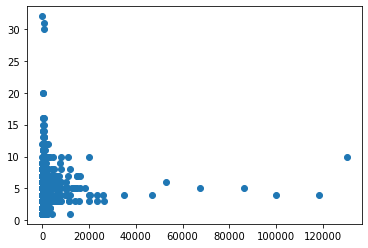

In [25]:
#Vamos a elimar las casas que superen los 500m2, ya que son outliers
#hacemos esto ya que las que estan por debajo de los 200m2 son el 85% de las casas
plt.scatter(df["surface_total_in_m2"], df["rooms"])
len(df[(df["surface_total_in_m2"] > 2000)])

In [26]:
df = (df[(df["surface_total_in_m2"] < 200)])
df.shape

(27813, 7)

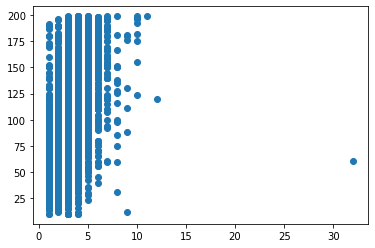

In [27]:
#Identificamos los outliers de rooms
plt.scatter(df["rooms"], df["surface_total_in_m2"])

In [28]:
#Eliminamos las propiedades con mas de 4 habitaciones ya que solo representan el 4%
df = (df[~(df["rooms"] > 4)])
df.shape

(26411, 7)

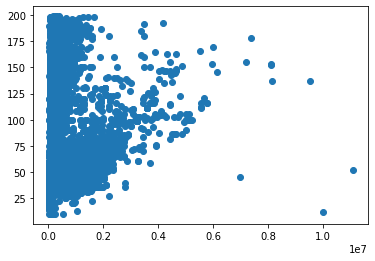

In [29]:
#Vamos a identificar outliers en el precio
plt.scatter(df["price"], df["surface_total_in_m2"])

In [30]:
#Eliminamos las casas que cuestan mas de 500000 ya que solo representan el 5.6%
df = (df[~(df["price"] > 500000)])

In [31]:
#Lo tipico es que por habitacion alla 20m2, osea una casa de 40m2 lo mas normal es que tenga 2 habitaciones
#Con esto ya podemos detectar algunos outliers
len(df[df["surface_total_in_m2"] / df["rooms"] < 20])

2827

In [32]:
#Eliminamos esos 3240 outliers
df = df[~(df["surface_total_in_m2"] / df["rooms"] < 20)]
df.shape

(21274, 7)

In [33]:
#Lo que vamos a hacer ahora es elimnar todos los price_per_sqft que esten por debajo y por encima del promedio +- std
df["price_per_m2"].describe()

count    21274.000000
mean      2006.735970
std        878.551410
min         26.315789
25%       1428.571429
50%       1901.250000
75%       2451.612903
max      16222.222222
Name: price_per_m2, dtype: float64

In [34]:
df.groupby("place_name").mean()

,price,surface_total_in_m2,surface_covered_in_m2,rooms,price_per_m2
place_name,,,,,
Abasto,114530.000000,60.500000,53.800000,2.166667,1933.471024
Acacias Blancas,173800.000000,133.200000,129.000000,4.000000,1357.587666
Acassuso,240071.428571,104.357143,100.857143,2.928571,2522.184199
Adrogué,185434.314815,96.296296,82.537037,2.796296,2097.116903
Agronomía,126629.629630,57.703704,48.777778,2.259259,2267.458172
...,...,...,...,...,...
Villa Sarmiento,110772.727273,78.742424,70.136364,2.469697,1527.042364
Villa Urquiza,137441.917293,63.185464,52.879699,2.090226,2252.260884
Villa del Parque,126537.855072,66.623188,56.333333,2.195652,1985.716025


In [35]:
df.shape

(21274, 7)

In [36]:
#Funcion para elimnar las filas que superen el el mean+-std de price_per_m2
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    #Key es cada uno de los location y subdf son todas las columnas pero saparadas por location
    for key, subdf in df.groupby("place_name"):
        #Guardo en dos variables el mean y la std
        m = np.mean(subdf["price_per_m2"])
        st = np.std(subdf["price_per_m2"])
        #Me quedo con lo que este adentro del mean+-std
        reduced_df = subdf[(subdf["price_per_m2"] > (m-st)) & (subdf["price_per_m2"] < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [37]:
df = remove_pps_outliers(df)
print (df.shape)

(15173, 7)


In [38]:
#Graficamos para ver los precios por location y numeros de habitaciones ya que nos podemos llegar a encontrar casas con menos
#habitaciones y menos metros cuadrados que sean mas caras que una con mas habitaciones y mas metros cuadrados en la misma location
def plot_scatter_chart(df, location):
    bhk2 = df[(df["place_name"] == location) & (df["rooms"] == 2)]
    bhk3 = df[(df["place_name"] == location) & (df["rooms"] == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2["surface_total_in_m2"], bhk2["price"], color="blue", 
               label="2 BHK")
    plt.scatter(bhk3["surface_total_in_m2"], bhk3["price"], marker="+",
               color="green", label="3 BHK")
    #plt.xticks(range(0,2001,200))
    plt.xlabel("Total m^2")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()
    plt.show()

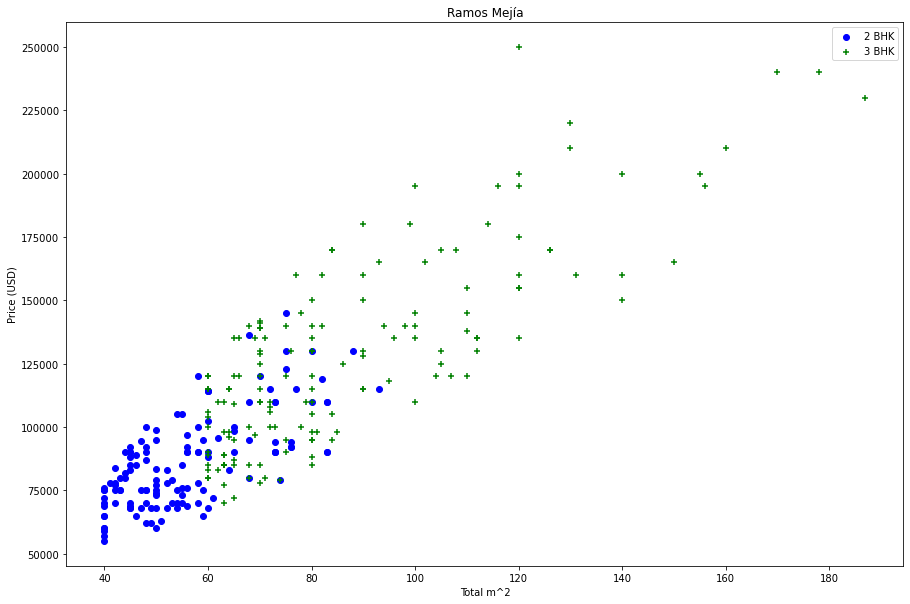

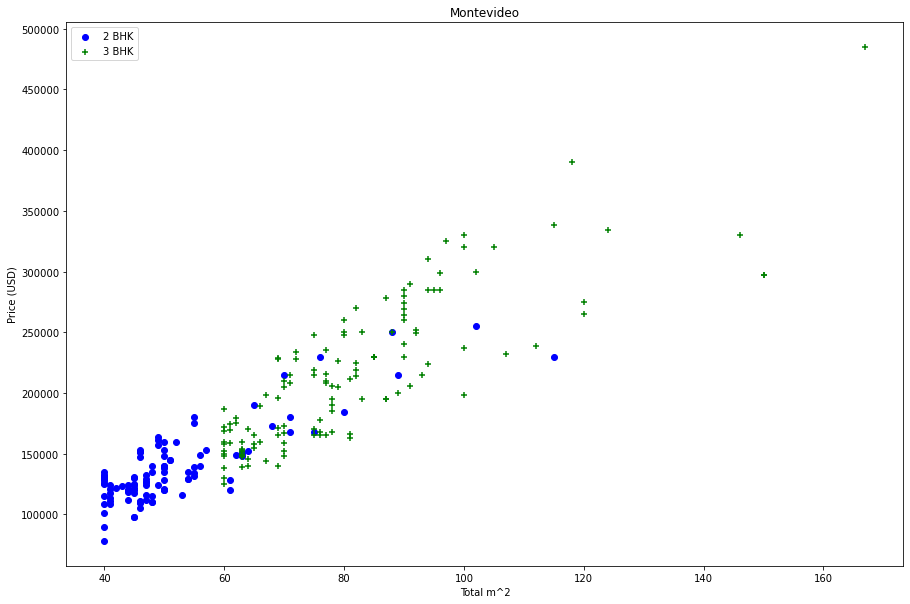

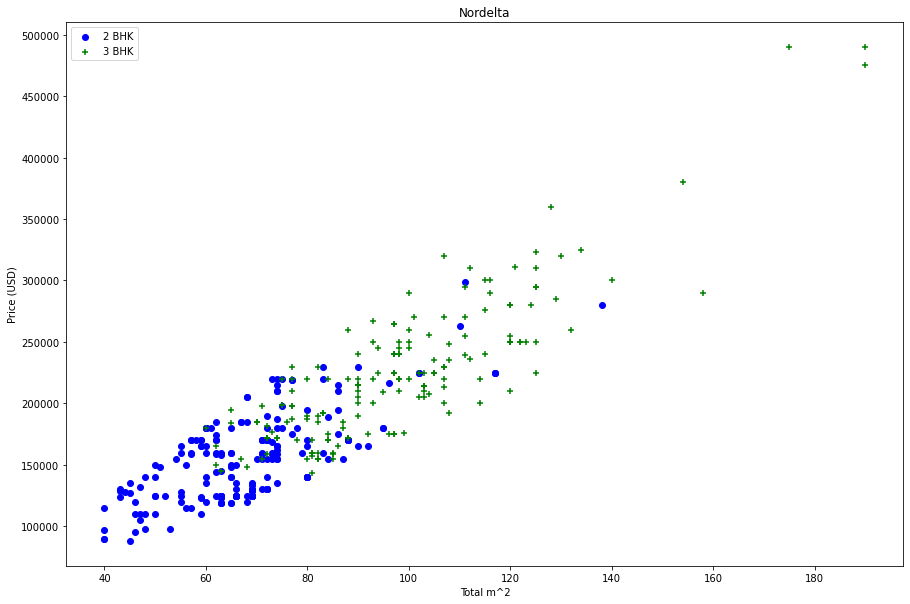

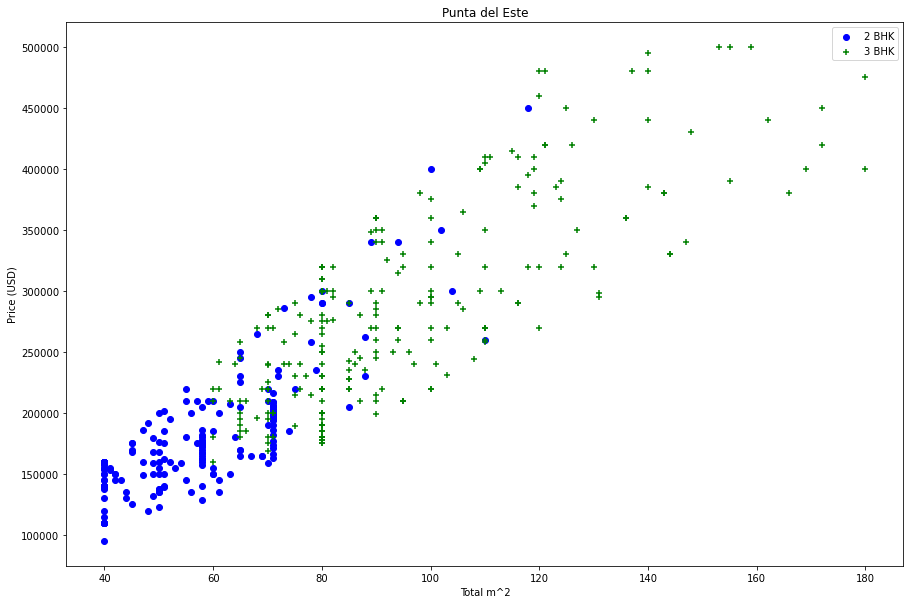

In [39]:
plot_scatter_chart(df, "Ramos Mejía")
plot_scatter_chart(df, "Montevideo")
plot_scatter_chart(df, "Nordelta")
plot_scatter_chart(df, "Punta del Este")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    #location = todas los lugares, location_df = todas las columnas agrupadas por lugares
    for location, location_df in df.groupby('place_name'):
        bhk_stats = {}   
        #bhk_df = todas las columnas pero separadas por lugares y ademas separadas por rooms
        for bhk, bhk_df in location_df.groupby('rooms'):
            #Aca guardamos el promedio, std, cuantas de precio por m2, en bhk=numero de rooms por casa
            #Ej bhk_stats[1](una habitacion) = mean(precio m2 en Belgrano(de una sola habitacion)), std(precio m2 en Belgrano(de una sola habitacion)), cuantas 
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df["price_per_m2"]),
                'std': np.std(bhk_df["price_per_m2"]),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('rooms'):
            stats = bhk_stats.get(bhk-1)
            #Eliminamos si esta por debajo del promedio
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_m2"]<=(stats['mean']*0.7)].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
df = remove_bhk_outliers(df)
df.shape

(14466, 7)

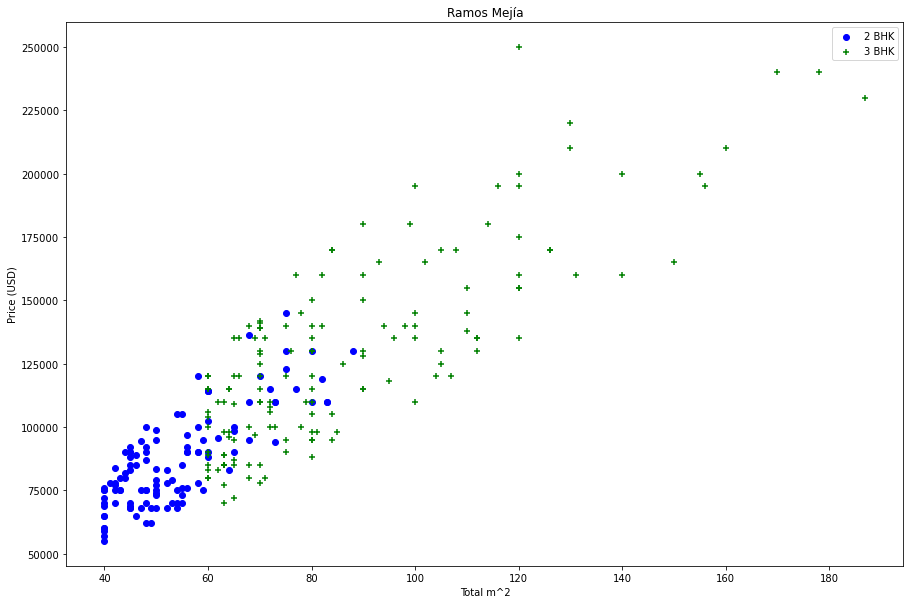

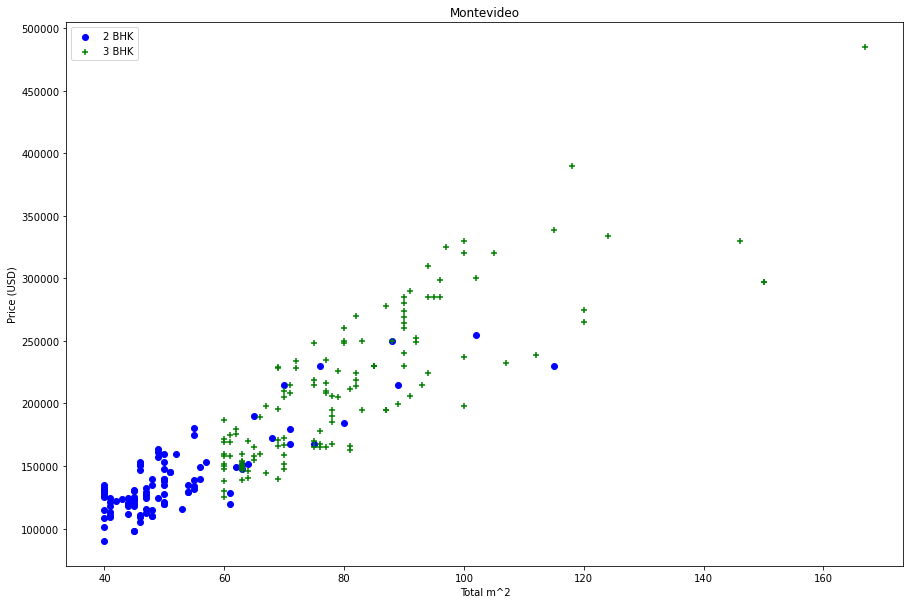

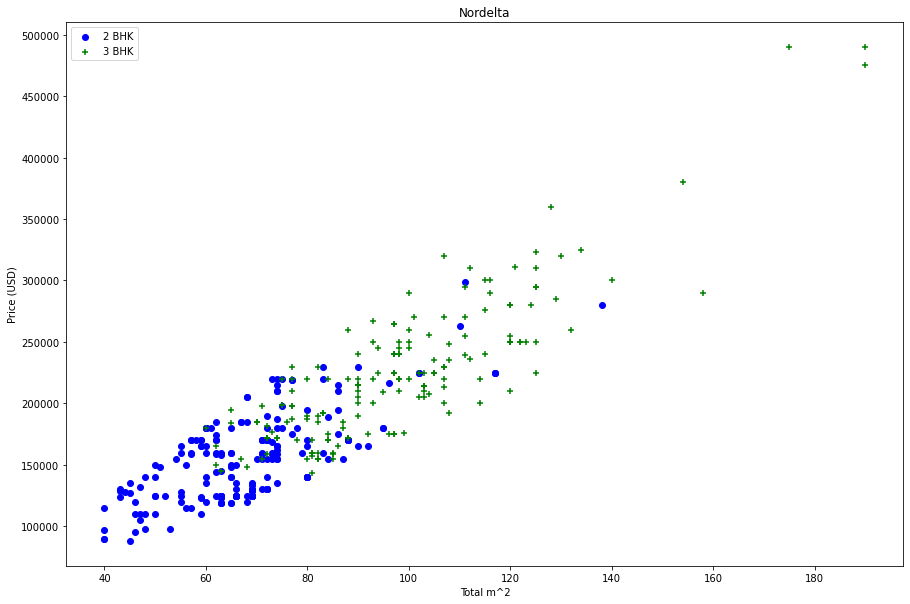

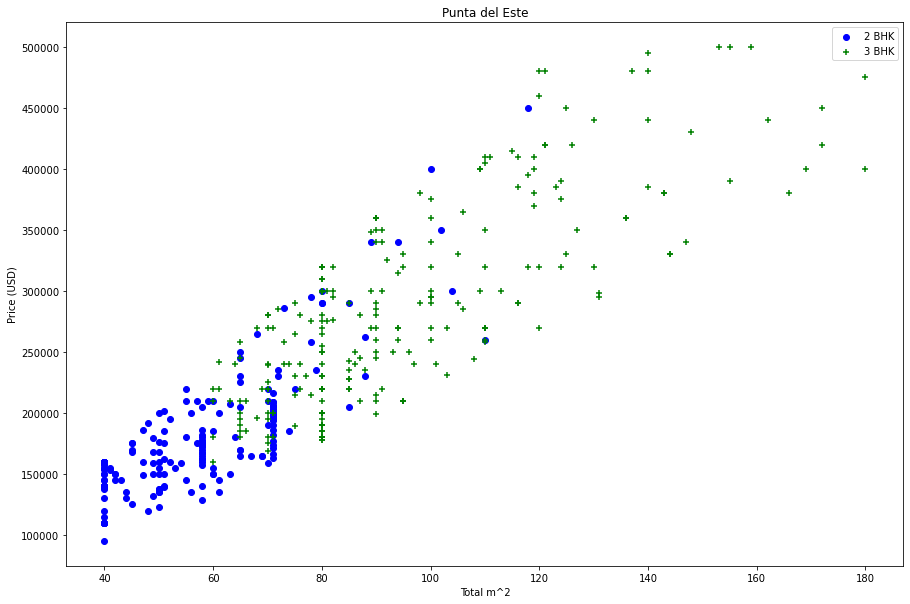

In [42]:
plot_scatter_chart(df, "Ramos Mejía")
plot_scatter_chart(df, "Montevideo")
plot_scatter_chart(df, "Nordelta")
plot_scatter_chart(df, "Punta del Este")

In [44]:
#Vamos a eliminar las filas que tienen mas m2 cubiertos que m2 en terreno (ya que es imposible)
len (df[(df["surface_covered_in_m2"] > df["surface_total_in_m2"])])

237

In [45]:
df = df[~(df["surface_covered_in_m2"] > df["surface_total_in_m2"])]

In [46]:
df.shape

(14229, 7)

In [47]:
#Eliminamos la columna price_per_m2 ya que solamente la usamos para identificar outliers
df = df.drop("price_per_m2", axis="columns")
df.head(2)

,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,rooms
0,apartment,Abasto,84000.0,43.0,40.0,1.0
1,apartment,Abasto,168000.0,87.0,87.0,4.0


In [48]:
#Usamos variables dummies para la location y para property_type
dummies = pd.get_dummies(df[["place_name","property_type"]])
dummies.head(2)

,place_name_Abasto,place_name_Acacias Blancas,place_name_Acassuso,place_name_Adrogué,place_name_Agronomía,place_name_Almagro,place_name_Altamira,place_name_Avellaneda,place_name_Bahía Blanca,place_name_Balvanera,...,place_name_Villa Santa Rita,place_name_Villa Sarmiento,place_name_Villa Urquiza,place_name_Villa del Parque,place_name_Villanueva,place_name_otro,property_type_PH,property_type_apartment,property_type_house,property_type_store
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#Juntamos nuestro df con las dummies
df = pd.concat([df, dummies], axis="columns")
df.head(2)

,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,rooms,place_name_Abasto,place_name_Acacias Blancas,place_name_Acassuso,place_name_Adrogué,...,place_name_Villa Santa Rita,place_name_Villa Sarmiento,place_name_Villa Urquiza,place_name_Villa del Parque,place_name_Villanueva,place_name_otro,property_type_PH,property_type_apartment,property_type_house,property_type_store
0,apartment,Abasto,84000.0,43.0,40.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,apartment,Abasto,168000.0,87.0,87.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
#Ahora podemos borrar la columna place_name
df = df.drop(["place_name", "property_type"], axis="columns")
df.head(2)

,price,surface_total_in_m2,surface_covered_in_m2,rooms,place_name_Abasto,place_name_Acacias Blancas,place_name_Acassuso,place_name_Adrogué,place_name_Agronomía,place_name_Almagro,...,place_name_Villa Santa Rita,place_name_Villa Sarmiento,place_name_Villa Urquiza,place_name_Villa del Parque,place_name_Villanueva,place_name_otro,property_type_PH,property_type_apartment,property_type_house,property_type_store
0,84000.0,43.0,40.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,168000.0,87.0,87.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Armamos nuestro modelo

In [51]:
df.shape

(14229, 212)

In [52]:
#Creamos X, la variable predictora
X = df.drop("price", axis="columns")
print (X.shape)
X.head(1)

(14229, 211)


,surface_total_in_m2,surface_covered_in_m2,rooms,place_name_Abasto,place_name_Acacias Blancas,place_name_Acassuso,place_name_Adrogué,place_name_Agronomía,place_name_Almagro,place_name_Altamira,...,place_name_Villa Santa Rita,place_name_Villa Sarmiento,place_name_Villa Urquiza,place_name_Villa del Parque,place_name_Villanueva,place_name_otro,property_type_PH,property_type_apartment,property_type_house,property_type_store
0,43.0,40.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
#Cremos y, la variable a predecir
y = df["price"]
print(y.shape)
y.head()

(14229,)


0     84000.0
1    168000.0
2     85000.0
3     75000.0
4     86600.0
Name: price, dtype: float64

In [54]:
#Separamos train de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [56]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
round(lr_clf.score(X_test, y_test), 3)

0.87